## Importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

## Loading datasets:

In [2]:
datapath = Path("../datasets/lifesat")

oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

## Preprocesing GDP per Capital

In [3]:
# Preprocess the GDP per capita data to keep only the year 2020:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"
gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]     # Keep only 2020 data
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)          # Drop unnecessary columns Code and Year
gdp_per_capita.columns = ["Country", gdppc_col]                         # Rename original dataset columns names (the first two columns) to "Country" and "GDP per capita (USD)"
gdp_per_capita.set_index("Country", inplace=True)                       # Set the index of the dataset to be the "Country" instead of the default index (numeric)
                                                                        # inplace=True, means that the changes are made directly to the dataset and not is necessary to assign the result to a new variable
print(gdp_per_capita.head())

                             GDP per capita (USD)
Country                                          
Afghanistan                           1978.961579
Africa Eastern and Southern           3387.594670
Africa Western and Central            4003.158913
Albania                              13295.410885
Algeria                              10681.679297


## Preprocesing OECD Better Life Index (BLI) data

In [4]:
# Preprocess the OECD Better Life Index (BLI) data:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]                              # Keep only the total values (not specific values for   
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value") # It's like groupby country (rows) and indicator (columns) and set the values for these specified in the values parameter (in this case de column also named Value)
# Example (not real data):
# INDICATOR   Air pollution  Educational attainment  Water quality
# Country                                                         
# Australia              5.0                   81.0          93.0
# Austria               16.0                   85.0          92.0
# Belgium               15.0                   77.0          84.0
print(oecd_bli.head())

Indicator  Air pollution  Dwellings without basic facilities  \
Country                                                        
Australia            5.0                                 NaN   
Austria             16.0                                 0.9   
Belgium             15.0                                 1.9   
Brazil              10.0                                 6.7   
Canada               7.0                                 0.2   

Indicator  Educational attainment  Employees working very long hours  \
Country                                                                
Australia                    81.0                              13.04   
Austria                      85.0                               6.66   
Belgium                      77.0                               4.75   
Brazil                       49.0                               7.13   
Canada                       91.0                               3.69   

Indicator  Employment rate  Feeling safe walki

## Merging datasets

In [5]:
# Merge the two datasets:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)   # Merge the two datasets by the index (Country)
print(full_country_stats.columns)                                                                       # show only the columns names
full_country_stats.sort_values(by=gdppc_col, inplace=True)                                              # Sort the dataset by the GDP per capita column
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]                                       # Keep only the GDP per capita and Life satisfaction columns

print(full_country_stats.head())

Index(['Air pollution', 'Dwellings without basic facilities',
       'Educational attainment', 'Employees working very long hours',
       'Employment rate', 'Feeling safe walking alone at night',
       'Homicide rate', 'Household net adjusted disposable income',
       'Household net wealth', 'Housing expenditure',
       'Labour market insecurity', 'Life expectancy', 'Life satisfaction',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health',
       'Stakeholder engagement for developing regulations', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education', 'GDP per capita (USD)'],
      dtype='object')
              GDP per capita (USD)  Life satisfaction
Country                                              
South Africa          11466.189672                4.7
Colombia              13441.492952                6.3
Bra

#

In [6]:
## Filter by min and max GDP.
# To illustrate the risk of overfitting, I use only part of the data in most figures (all countries with a GDP per capita between min_gdp and max_gdp).
#  Later in the chapter I reveal the missing countries, and show that they don't follow the same linear trend at all.

In [7]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
print(country_stats.head())

         GDP per capita (USD)  Life satisfaction
Country                                         
Russia           26456.387938                5.8
Greece           27287.083401                5.4
Turkey           28384.987785                5.5
Latvia           29932.493910                5.9
Hungary          31007.768407                5.6


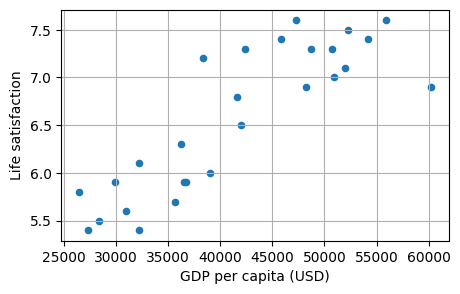

In [8]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True, x=gdppc_col, y=lifesat_col)
plt.show()